In [1]:
import scvelo as scv
import scanpy as sc
import pandas as pd
import numpy as np
import scipy
import anndata as ad

In [2]:
adata = scv.read("../velocyto/10X_multiome_mouse_brain.loom", cache = True)

In [3]:
adata.obs_names = [x.split(':')[1][:-1] + '-1' for x in adata.obs_names]
adata.var_names_make_unique()

In [4]:
cell_annot = pd.read_csv('../cell_annotations.tsv', sep='\t', index_col=0)

In [5]:
adata = adata[cell_annot.index,:]
adata.obs['celltype'] = cell_annot['celltype']

In [6]:
adata = adata[adata.obs['celltype'].isin(['RG, Astro, OPC', 
                                                      'IPC', 
                                                      'V-SVZ', 
                                                      'Upper Layer', 
                                                      'Deeper Layer', 
                                                      'Ependymal cells', 
                                                      'Subplate'])]

In [7]:
adata.obs['celltype'] = cell_annot.loc[adata.obs_names, 'celltype']
adata.obs['celltype'] = adata.obs['celltype'].astype('category')

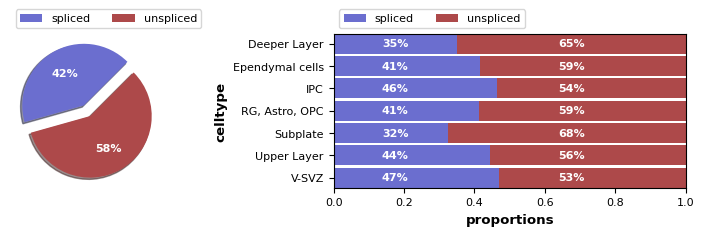

In [8]:
scv.pl.proportions(adata, groupby = "celltype")

In [9]:
scv.pp.filter_and_normalize(adata, min_shared_counts = 20, n_top_genes = 2000)
scv.pp.moments(adata, n_pcs = 30, n_neighbors = 30)

Filtered out 23038 genes that are detected 20 counts (shared).
Normalized count data: X, spliced, unspliced.
Extracted 2000 highly variable genes.
Logarithmized X.
computing neighbors
    finished (0:00:03) --> added 
    'distances' and 'connectivities', weighted adjacency matrices (adata.obsp)
computing moments based on connectivities
    finished (0:00:00) --> added 
    'Ms' and 'Mu', moments of un/spliced abundances (adata.layers)


In [10]:
sc.tl.leiden(adata)

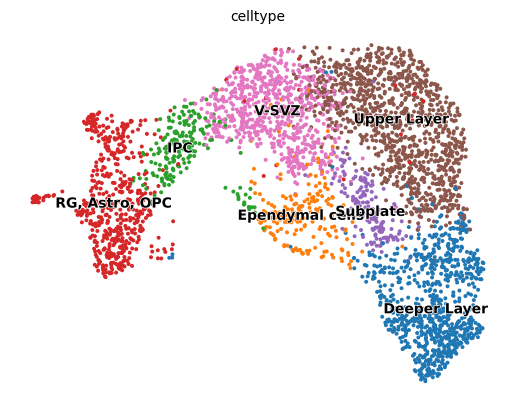

In [11]:
scv.tl.umap(adata)
scv.pl.umap(adata, color='celltype')

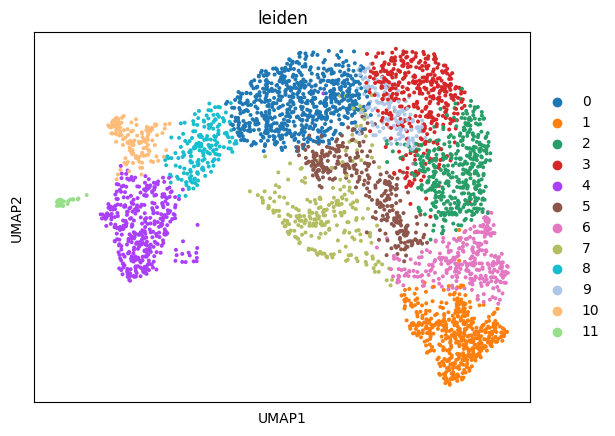

In [12]:
sc.pl.umap(adata, color = "leiden")

In [13]:
adata.uns["iroot"] = np.flatnonzero(adata.obs["leiden"] == '8')[0]

In [14]:
sc.tl.dpt(adata)

In [15]:
adata

AnnData object with n_obs × n_vars = 3653 × 2000
    obs: 'celltype', 'initial_size_unspliced', 'initial_size_spliced', 'initial_size', 'n_counts', 'leiden', 'dpt_pseudotime'
    var: 'Accession', 'Chromosome', 'End', 'Start', 'Strand', 'gene_count_corr', 'means', 'dispersions', 'dispersions_norm', 'highly_variable'
    uns: 'pca', 'neighbors', 'leiden', 'umap', 'celltype_colors', 'leiden_colors', 'iroot', 'diffmap_evals'
    obsm: 'X_pca', 'X_umap', 'X_diffmap'
    varm: 'PCs'
    layers: 'ambiguous', 'matrix', 'spliced', 'unspliced', 'Ms', 'Mu'
    obsp: 'distances', 'connectivities'

In [16]:
adata.write_h5ad("data/JuloVelo_pre.h5ad")